In [1]:
# %matplotlib widget
# %matplotlib tk
import godot

import numpy as np
from godot.core import tempo, util
import matplotlib.pyplot as plt


# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

import os
os.makedirs('./output/',exist_ok = True)

# create the universe
uni_config = godot.cosmos.util.load_yaml('universe2.yml')
uni = godot.cosmos.Universe(uni_config)

In [2]:
t = tempo.Epoch('2026-03-14T07:10:00 TDB')
moon = uni.frames.vector3('Moon','Moon','ICRF', t)
sun = uni.frames.vector3('Moon','Sun','ICRF', t)
earth = uni.frames.vector3('Moon','Earth', 'ICRF', t)
sc = uni.frames.vector3('Moon','SC', 'ICRF', t)
print(sc.shape)

(3,)


In [ ]:
from mani import GodotHandler
from godot.core import tempo
uni_file = './universe2.yml'
ep1 = tempo.Epoch('2026-06-01T00:00:00 TDB')
ep2 = tempo.Epoch('2027-06-01T00:00:00 TDB')
godotHandler = GodotHandler(ep1, ep2, 1.0, './universe2.yml')
res = godotHandler.calculate_visibility()


Initializing calculate visibility
Initializing Halo Orbit
Time (TU),X (LU),Y (LU),Z (LU),VX (LU/TU),VY (LU/TU),VZ (LU/TU)

Creating chunks
Evaluating chunks


Process ForkPoolWorker-23:
Process ForkPoolWorker-24:
Process ForkPoolWorker-22:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-21:
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self.

KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/pool.py", line 

  File "/home/dyb/Documents/GitHub/GODOTWork/mani/GodotEvaluator.py", line 119, in _evaluate_timestamps
    GS = uni.frames.vector3('Moon',station, 'ICRF', t)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
KeyboardInterrupt
Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Traceback (most recent call last):
Process ForkPoolWorker-15:
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/home/dyb/miniconda3/envs/godot/lib/python3.12/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/home/dyb/Documen

In [ ]:
from mani import StateEvaluator, SEEnum
elev_lim = 10
pos_flags = [SEEnum.SUN_ON_SPACECRAFT, SEEnum.CLEAR_MOON_NN]
pos_flags = [SEEnum.CLEAR_MOON_NN]
neg_flags = [SEEnum.SUN_ON_MOON]
condition = res.above_elev('NN11',elev_lim) & res.has(pos_flags) & res.has_not(neg_flags)
NN_time_spans = godotHandler.get_view_times_span(condition)

pos_flags = [SEEnum.SUN_ON_SPACECRAFT, SEEnum.CLEAR_MOON_CB]
pos_flags = [SEEnum.CLEAR_MOON_CB]
neg_flags = [SEEnum.SUN_ON_MOON]
condition = res.above_elev('CB11',elev_lim) & res.has(pos_flags) & res.has_not(neg_flags)
CB_time_spans = godotHandler.get_view_times_span(condition)

pos_flags = [SEEnum.SUN_ON_SPACECRAFT, SEEnum.CLEAR_MOON_MG]
pos_flags = [SEEnum.CLEAR_MOON_MG]
neg_flags = [SEEnum.SUN_ON_MOON]
condition = res.above_elev('MG11',elev_lim) & res.has(pos_flags) & res.has_not(neg_flags)

MG_time_spans = godotHandler.get_view_times_span(condition)
NN_arr =  godotHandler.get_view_time_lengths(NN_time_spans)
CB_arr =  godotHandler.get_view_time_lengths(CB_time_spans)
MG_arr =  godotHandler.get_view_time_lengths(MG_time_spans)

In [ ]:
from utils import get_date_string, convert_to_datetime

%matplotlib inline
%matplotlib widget
def plot_distributions(arrs, time_spans, labels, filename):
    if type(arrs) == np.ndarray:
        arrs = arrs[np.newaxis, :]
    
    arr_len = len(arrs)

    fig = plt.figure(figsize = (18,5))
    ax0, ax1, ax2 = fig.subplots(1,3)

    for i in range(arr_len):
        arr = arrs[i]
        if arr_len == 1:
            name = labels
            arr_times = [time.mjd()-time_spans[0,0].mjd() for time in time_spans[:,0]]
        else: 
            name = labels[i]
            arr_times = [time.mjd()-time_spans[i][0,0].mjd() for time in time_spans[i][:,0]]
        vals, bins = np.histogram(arr, bins=1000, weights=np.ones(len(arr)) / len(arr))
        ax0.plot(bins[:-1], np.cumsum(vals), label = name)
        ax1.hist(arr, bins = 100, weights=np.ones(len(arr)) / len(arr), label = name)
        ax2.scatter(arr_times, arr, label= name, s=3)

    ax0.grid()
    ax0.set_xlabel('Duration [s]')
    ax0.set_ylabel('Cumulative Distribution Function')
    ax0.legend()
    ax0.set_title('CDF of Visible Durations')

    ax1.grid()
    ax1.set_xlabel('Duration [s]')
    ax1.set_ylabel('Normalized Distribution')
    ax1.set_title('Histogram of Visbile Durations')
    ax1.legend()

    ax2.grid()
    ax2.set_xlabel('Starting time of visibility period [day]')
    ax2.set_ylabel('Duration [s]')
    ax2.set_title('Duration of visibility')
    ax2.legend()

    all_times = []
    if arr_len == 1:
        all_times.extend(time_spans)
    else:
        [all_times.extend(time_span) for time_span in time_spans]
    start_t = get_date_string(np.min(all_times))
    end_t = get_date_string(np.max(all_times))

    fig.suptitle(f'Visibility duration evaluated from {start_t} to {end_t}')

    fig.savefig('./output/'+filename+'.png', bbox_inches='tight')

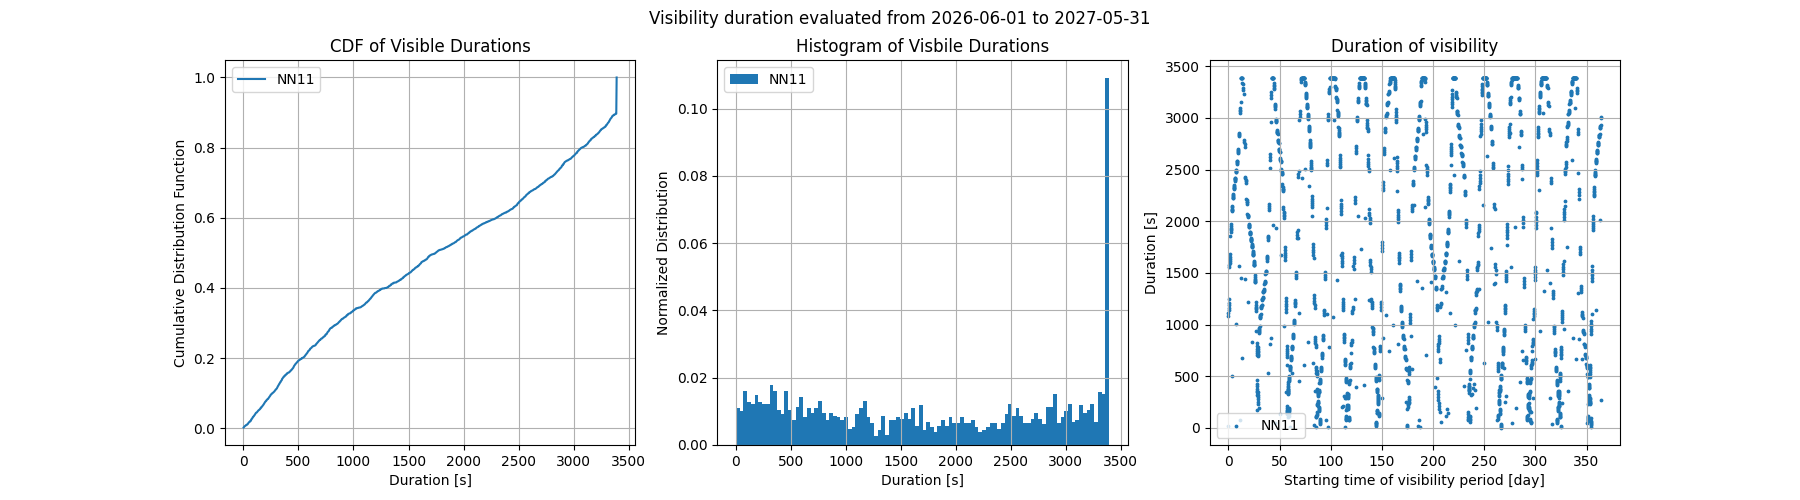

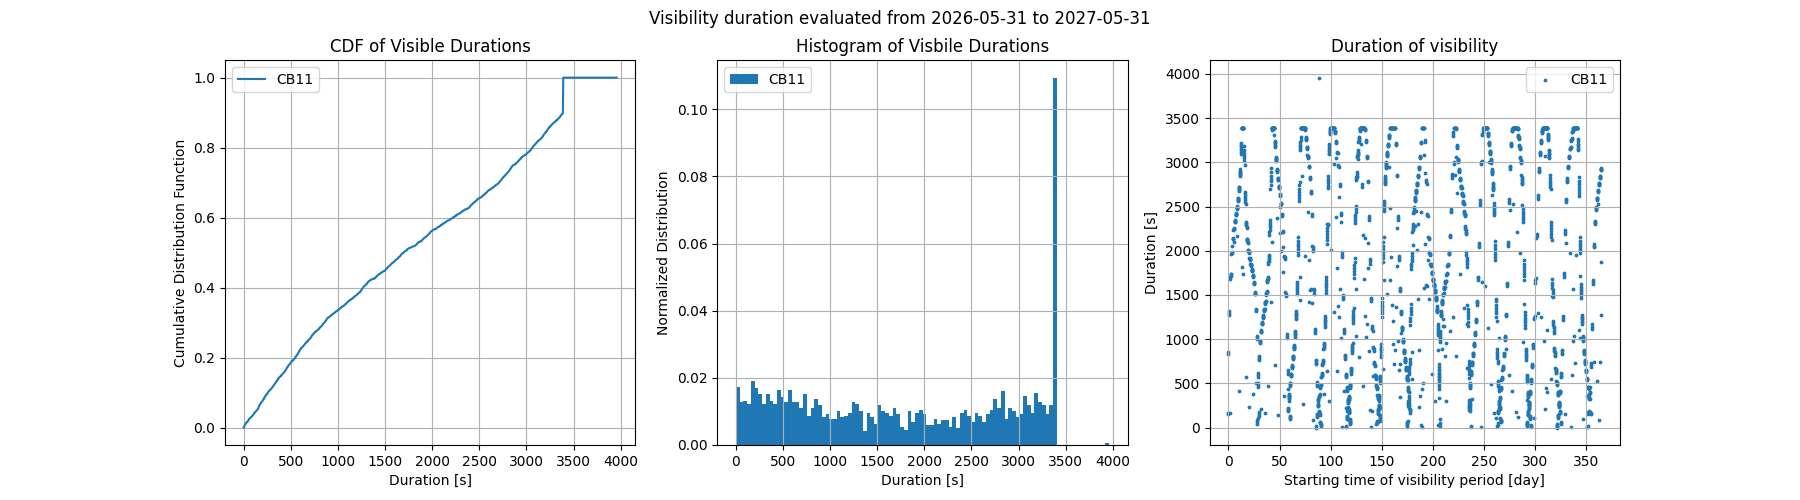

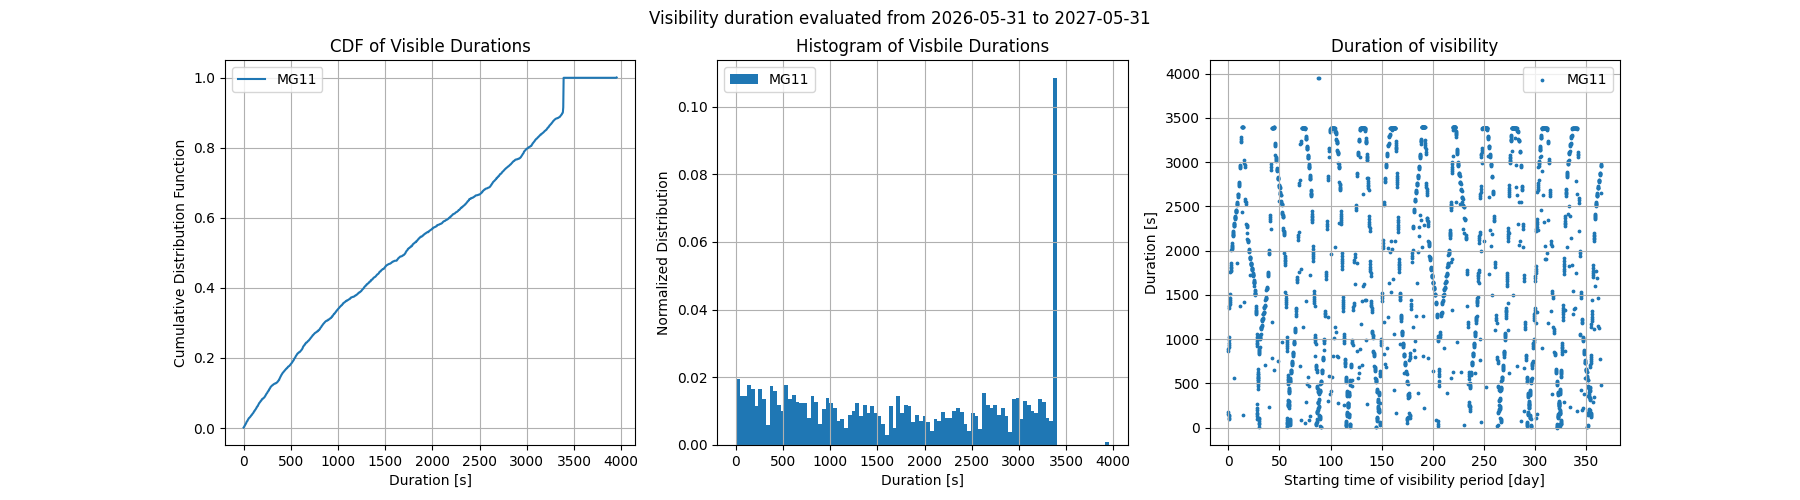

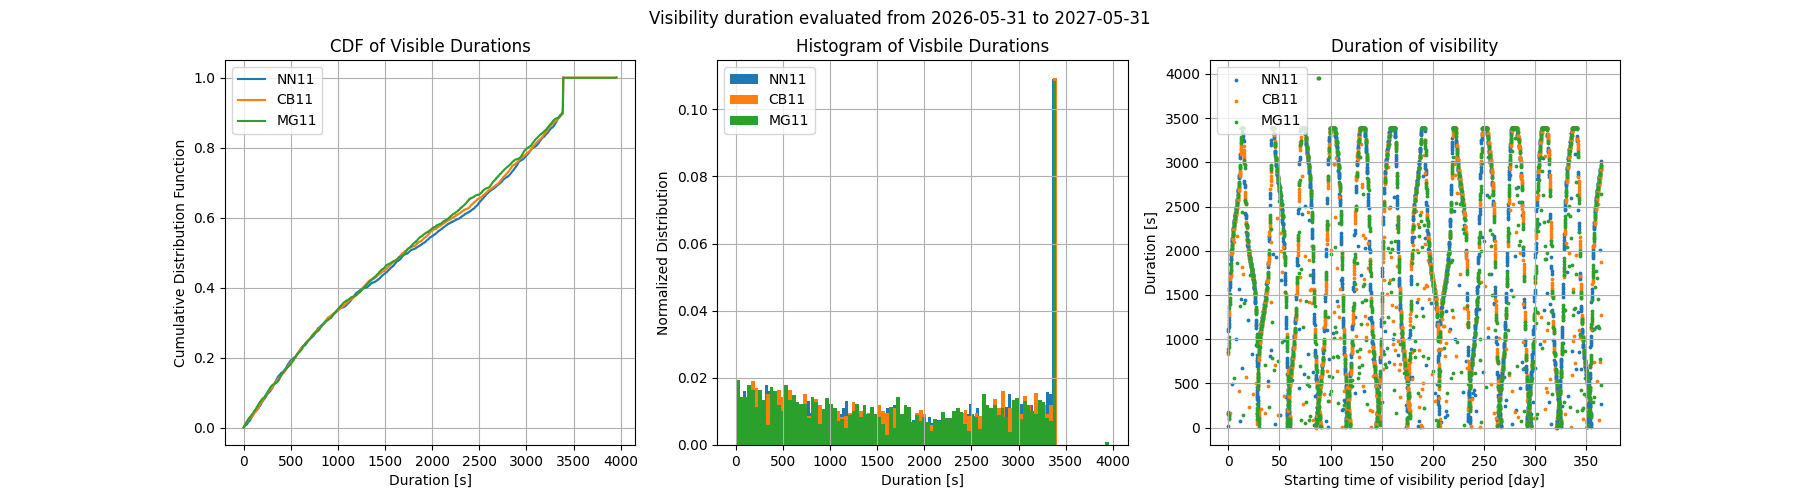

In [8]:
plot_distributions(NN_arr, NN_time_spans, 'NN11', 'NN_only')
plot_distributions(CB_arr, CB_time_spans, 'CB11', 'CB_only')
plot_distributions(MG_arr, MG_time_spans, 'MG11', 'MG_only')
plot_distributions([NN_arr, CB_arr, MG_arr],
                   [NN_time_spans, CB_time_spans, MG_time_spans],
                   ['NN11','CB11','MG11'],
                   'common')

HP mode 2026-06-01T00:16:34.000000 TDB to 2026-06-01T00:30:54.000000 TDB, duration 860.0 secs
HP mode 2026-06-01T01:10:06.000000 TDB to 2026-06-01T01:13:05.000000 TDB, duration 179.0 secs
HP mode 2026-06-01T02:09:37.000000 TDB to 2026-06-01T02:24:25.000000 TDB, duration 888.0 secs
HP mode 2026-06-01T03:03:30.000000 TDB to 2026-06-01T03:06:09.000000 TDB, duration 159.0 secs
HP mode 2026-06-01T04:02:40.000000 TDB to 2026-06-01T04:17:52.000000 TDB, duration 912.0 secs
HP mode 2026-06-01T04:56:51.000000 TDB to 2026-06-01T04:59:12.000000 TDB, duration 141.0 secs
HP mode 2026-06-01T05:55:44.000000 TDB to 2026-06-01T06:11:17.000000 TDB, duration 933.0 secs
HP mode 2026-06-01T06:50:09.000000 TDB to 2026-06-01T06:52:15.000000 TDB, duration 126.0 secs
HP mode 2026-06-01T07:48:47.000000 TDB to 2026-06-01T08:04:44.000000 TDB, duration 957.0 secs
HP mode 2026-06-01T08:43:27.000000 TDB to 2026-06-01T08:45:18.000000 TDB, duration 111.0 secs
HP mode 2026-06-01T09:41:50.000000 TDB to 2026-06-01T09:58:1

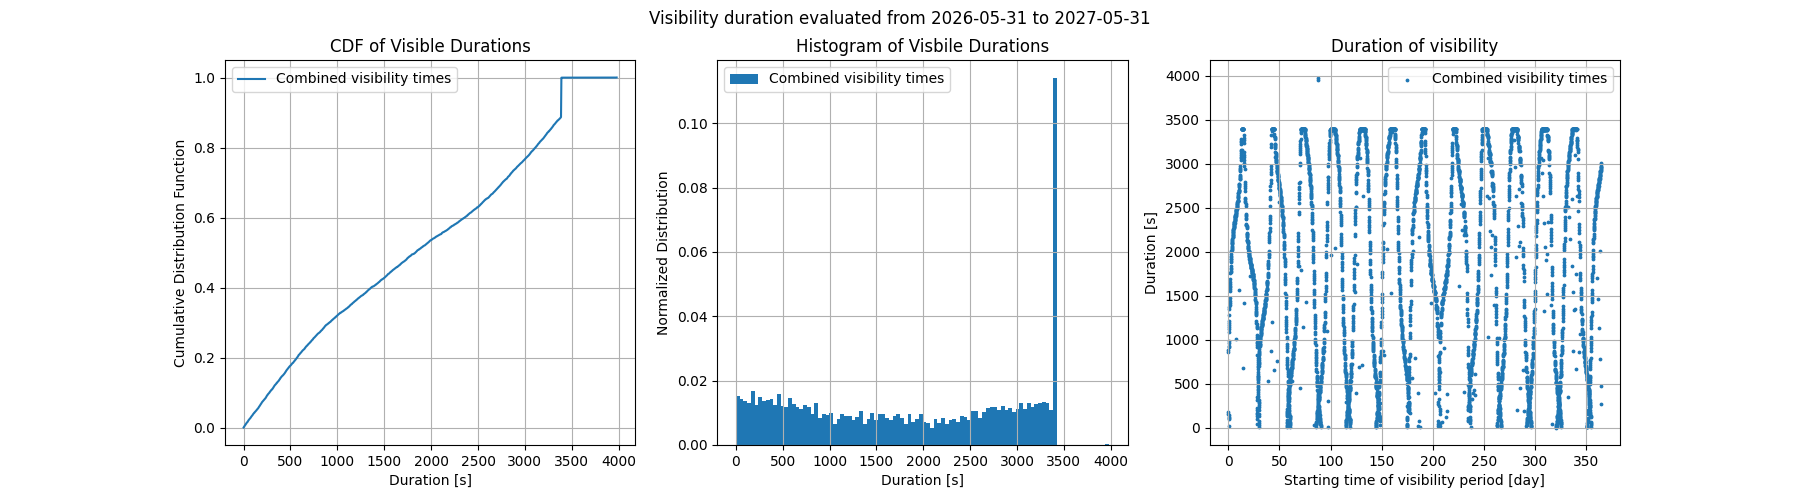

In [9]:
elev_lim = 10
los_NN = res.above_elev('NN11', elev_lim) & res.has([SEEnum.CLEAR_MOON_NN])
los_CB = res.above_elev('CB11', elev_lim) & res.has([SEEnum.CLEAR_MOON_CB])
los_MG = res.above_elev('MG11', elev_lim) & res.has([SEEnum.CLEAR_MOON_MG])
condition = (los_NN | los_CB | los_MG) & res.has_not([SEEnum.SUN_ON_MOON])
view_time_span = godotHandler.get_view_times_span(condition)
visibility_length =  godotHandler.get_view_time_lengths(view_time_span)

plot_distributions(visibility_length, view_time_span, 'Combined visibility times', 'combed_vis_time')

for interval in view_time_span:
    start = interval[0]
    end = interval[1]
    print( f"HP mode {start} to {end}, duration {end - start} secs" )
print(np.mean(view_time_span[:,1]-view_time_span[:,0]) / 60 /113)
print(np.mean(view_time_span[:,1]-view_time_span[:,0]))

/home/es820/miniconda3/envs/godot/lib/python3.10/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


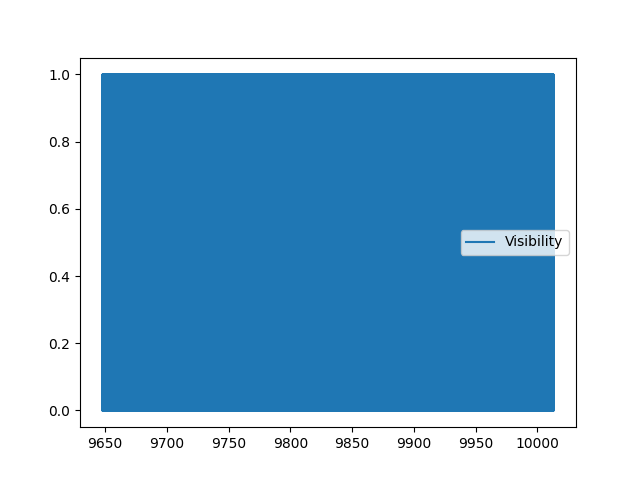

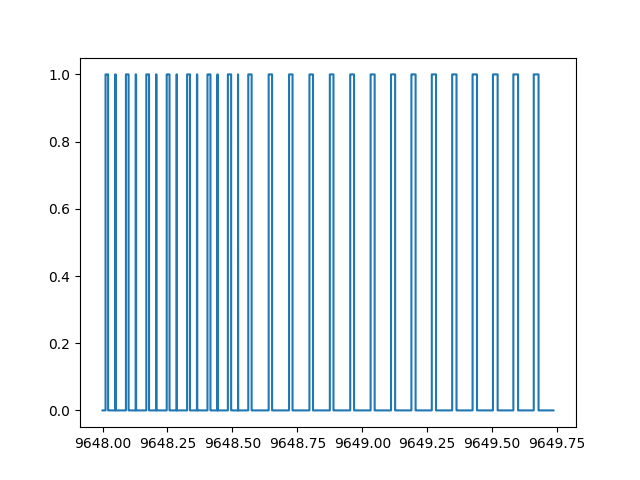

In [10]:
plt.figure()
n  = 1500000
span = [n,n+100000]
event_grid = godotHandler.get_event_grid()
times = [time.mjd() for time in event_grid]
plt.step(times, condition.to_list(), label='Visibility')
plt.legend()
plt.show()

plt.figure()
n  = 0
span = [n,n+150000]
times = [time.mjd() for time in event_grid[span[0]:span[1]]]
plt.step(times, condition.to_list()[span[0]:span[1]], label='Visibility')
plt.show()
del event_grid, times


# Evaluate times where 

/tmp/ipykernel_540689/1767879387.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig('./output/'+filename+'.png', bbox_inches='tight')


0.05088456048101117
344.9973200612557


/home/es820/miniconda3/envs/godot/lib/python3.10/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


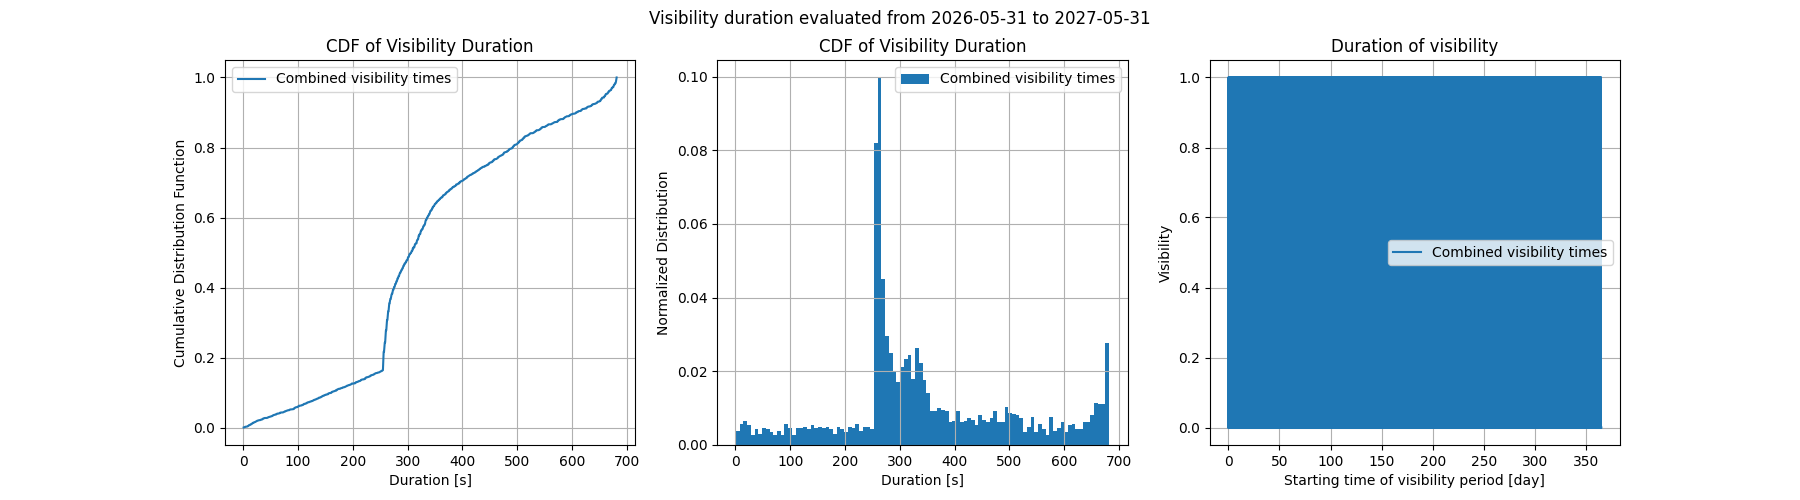

In [11]:
elev_lim = 10
los_CB = res.above_elev('CB11',elev_lim) & res.has([SEEnum.CLEAR_MOON_CB])
condition = (res.has([SEEnum.SUN_ON_SPACECRAFT]) & res.has_not([SEEnum.SUN_ON_MOON]) & los_CB)

rare_sun_spans = godotHandler.get_view_times_span(condition)
rare_sun_times =  godotHandler.get_view_time_lengths(rare_sun_spans)

def plot_cdf(ax, bins,vals, name):
    ax.plot(bins[:-1], np.cumsum(vals), label = name)
    ax.grid()
    ax.set_xlabel('Duration [s]')
    ax.set_ylabel('Cumulative Distribution Function')
    ax.legend()
    ax.set_title('CDF of Visibility Duration')

def plot_hist(ax, arr, name):
    ax.hist(arr, bins = 100, weights=np.ones(len(arr)) / len(arr), label = name)
    ax.grid()
    ax.set_xlabel('Duration [s]')
    ax.set_ylabel('Normalized Distribution')
    ax.set_title('CDF of Visibility Duration')
    ax.legend()

def plot_times(ax, grid, condition, name):
    times = [time.mjd()-grid[0].mjd() for time in grid]
    ax.plot(times, condition, label= name)
    ax.grid()
    ax.set_xlabel('Starting time of visibility period [day]')
    ax.set_ylabel('Visibility')
    ax.set_title('Duration of visibility')
    ax.legend()


%matplotlib widget
def plot_distributions_2(arr, time_spans, grid, condition, labels, filename):

    fig = plt.figure(figsize = (18,5))
    ax0, ax1, ax2 = fig.subplots(1,3)

    name = labels
    vals, bins = np.histogram(arr, bins=1000, weights=np.ones(len(arr)) / len(arr))
    plot_cdf(ax0, bins, vals, name)

    plot_hist(ax1, arr, name)

    plot_times(ax2, grid, condition, name)

    all_times = time_spans
    start_t = get_date_string(np.min(all_times))
    end_t = get_date_string(np.max(all_times))

    fig.suptitle(f'Visibility duration evaluated from {start_t} to {end_t}')

    fig.savefig('./output/'+filename+'.png', bbox_inches='tight')

event_grid = godotHandler.get_event_grid()
plot_distributions_2(rare_sun_times, rare_sun_spans, event_grid, condition, 'Combined visibility times', 'sun_times')
del event_grid
for interval in rare_sun_spans:
    start = interval[0]
    end = interval[1]
    #print( f"HP mode {start} to {end}, duration {end - start} secs" )
print(np.mean(rare_sun_spans[:,1]-rare_sun_spans[:,0]) / 60 /113)
print(np.mean(rare_sun_spans[:,1]-rare_sun_spans[:,0]))

In [12]:
elev_lim = 10
condition = res.above_elev('CB11', elev_lim) & res.has([SEEnum.CLEAR_MOON_CB])

def get_elev_in_los(times, elevations, conditions):
    timestamps = []
    elevationsstamps = []
    for i, t in enumerate(times):
        if conditions[i]:
            timestamps.append(convert_to_datetime(t))
            elevationsstamps.append(elevations[i])
    return timestamps, elevationsstamps

timestamps, elevations = get_elev_in_los(res['time'], res['elv_CB11'], condition)

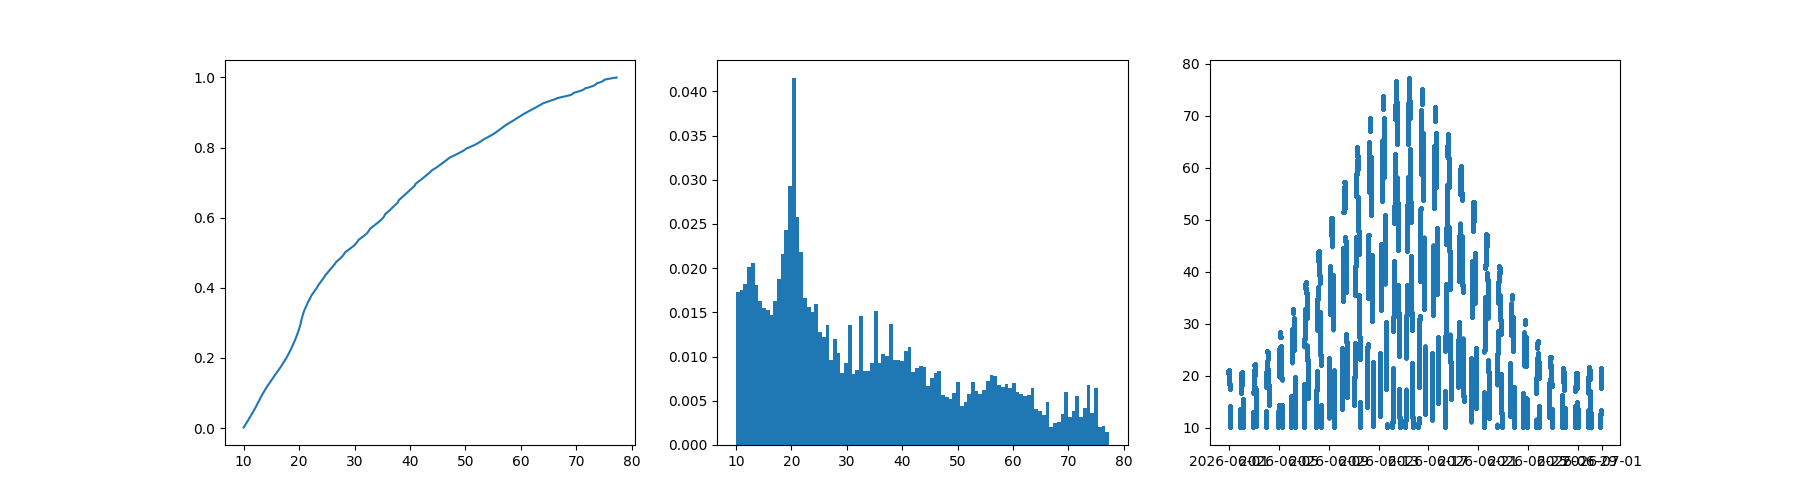

In [ ]:
plt.subplots(1,3, figsize = (18,5))
vals, bins = np.histogram(elevations, bins=1000, weights=np.ones(len(elevations)) / len(elevations))
plt.subplot(1,3,1)
plt.plot(bins[:-1], np.cumsum(vals))
plt.subplot(1,3,2)
plt.hist(elevations, bins = 100, weights=np.ones(len(elevations)) / len(elevations))
plt.subplot(1,3,3)
plt.scatter(timestamps, elevations, s=3)
plt.show()